# Week 10 Tutorial
This week comes to the basic statistic learning algorithms, including three basic classification algorithms (decision tree, k-nearest neighbors (knn), and Support Vector Machine （SVM）) and one clustering algorithm kmeans. 

In this tutorial, two dataset are applid to learn by these algorithms.

# Classification Algorithms (supervised learning)

# On Dataset 1:
As an example that only consider the simple case of a classification task.

We begin with the standard imports:

In [44]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from scipy import stats
# use seaborn plotting defaults

Consider the following two-dimensional data, which has one of five class labels:

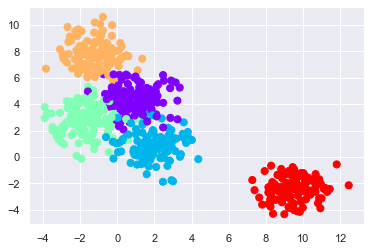

In [45]:
from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=600, centers=5,
                  random_state=0, cluster_std=1.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='rainbow');

Split arrays or matrices into random train and test subsets

The :mod:`sklearn.model_selection._split` module includes classes and
functions to split the data based on a preset strategy.

In [46]:
from sklearn.model_selection import train_test_split
xtrain1, xtest1, ytrain1, ytest1 = train_test_split(X, y)

Now, we can quickly classify the 600 points above by using the three classifiers as follows:

# Decision Tree Classifier:
A decision tree is a flowchart-like structure in which each internal node represents a "test" on an attribute (e.g. whether a coin flip comes up heads or tails), each branch represents the outcome of the test, and each leaf node represents a class label (decision taken after computing all attributes). The paths from root to leaf represent classification rules.

In decision analysis, a decision tree and the closely related influence diagram are used as a visual and analytical decision support tool, where the expected values (or expected utility) of competing alternatives are calculated.
  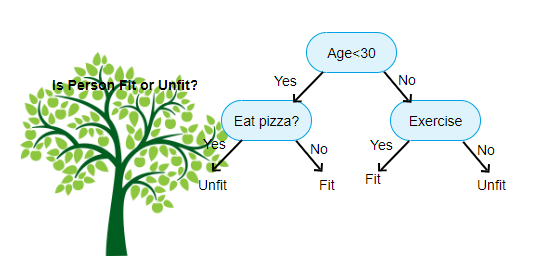
A decision tree consists of three types of nodes:
Decision nodes – typically represented by squares; Chance nodes – typically represented by circles; 
End nodes – typically represented by triangles

A simple decision tree built on this data will iteratively split the data along one or the other axis according to some quantitative criterion, and at each level assign the label of the new region according to a majority vote of points within it.

In [47]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

#Make an instance of the Decision Tree Model
dt_model = DecisionTreeClassifier(max_depth = 4);
#Train the model on the data
dt_model.fit(xtrain1, ytrain1)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

Let's write a quick utility function to help us visualize the output of the classifier:

In [48]:
def visualize_classifier(model, X, y, ax=None, cmap='rainbow'):
    ax = ax or plt.gca()
    
    # Plot the training points
    ax.scatter(X[:, 0], X[:, 1], c=y, s=30, cmap=cmap,
               clim=(y.min(), y.max()), zorder=3)
    ax.axis('tight')
    ax.axis('off')
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # fit the estimator
    model.fit(X, y)
    xx, yy = np.meshgrid(np.linspace(*xlim, num=200),
                         np.linspace(*ylim, num=200))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)

    # Create a color plot with the results
    n_classes = len(np.unique(y))
    contours = ax.contourf(xx, yy, Z, alpha=0.3,
                           levels=np.arange(n_classes + 1) - 0.5,
                           cmap=cmap, clim=(y.min(), y.max()),
                           zorder=1)

    ax.set(xlim=xlim, ylim=ylim)

Now we can examine what the decision tree classification looks like:

D:\CityU\CS1102\Anaconda\lib\site-packages\ipykernel_launcher.py:23: UserWarning: The following kwargs were not used by contour: 'clim'


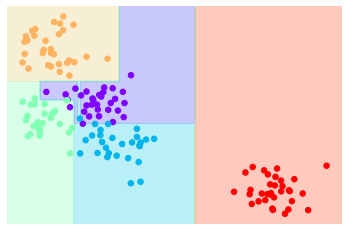

In [50]:
visualize_classifier(DecisionTreeClassifier(), xtest1, ytest1)

Now, we can take a look at the classification report for this decision tree classifier

In [51]:
from sklearn import metrics
dt_ypred = dt_model.predict(xtest1)
print(metrics.classification_report(dt_ypred,ytest1))

              precision    recall  f1-score   support

           0       0.87      0.82      0.84        33
           1       0.82      1.00      0.90        23
           2       0.96      0.87      0.91        30
           3       1.00      1.00      1.00        31
           4       1.00      1.00      1.00        33

    accuracy                           0.93       150
   macro avg       0.93      0.94      0.93       150
weighted avg       0.94      0.93      0.93       150



And for good measure, we're going to plot the confusion matrix:

Text(89.18, 0.5, 'predicted label')

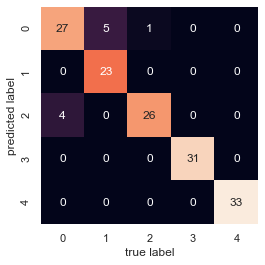

In [52]:
from sklearn.metrics import confusion_matrix
dt_mat = confusion_matrix(ytest1, dt_ypred)
sns.heatmap(dt_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

Evaluating and selecting the model based on five-fold cross validation

In [53]:
from sklearn.model_selection import cross_val_score
cross_val_score(dt_model, X, y, cv=5)

array([0.925     , 0.925     , 0.94166667, 0.975     , 0.91666667])

# k-Nearest Neighbors Classifier

In k-NN classification, the input consists of the k closest training examples in data set, and the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its k nearest neighbors (k is a positive integer, typically small). If k = 1, then the object is simply assigned to the class of that single nearest neighbor.

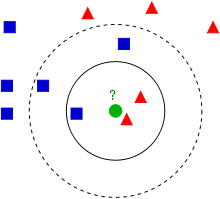
Example of k-NN classification. The test sample (green dot) should be classified either to blue squares or to red triangles. If k = 3 (solid line circle) it is assigned to the red triangles because there are 2 triangles and only 1 square inside the inner circle. If k = 5 (dashed line circle) it is assigned to the blue squares (3 squares vs. 2 triangles inside the outer circle).

k-NN is a type of classification where the function is only approximated locally and all computation is deferred until function evaluation. Since this algorithm relies on distance for classification (A commonly used distance metric for continuous variables is Euclidean distance. For discrete variables, such as for text classification, another metric can be used, such as the overlap metric or Hamming distance), if the features represent different physical units or come in vastly different scales then normalizing the training data can improve its accuracy dramatically.

For the normalization of data

The function normalize provides a quick and easy way to perform this operation on a single array-like dataset, either using the L1, L2, or max norms:

In [9]:
from sklearn import preprocessing
x_normalized = preprocessing.normalize(xtest1, norm='l2')

In [10]:
from sklearn.neighbors import KNeighborsClassifier
#Make an instance of the KNN Model
knn_model = KNeighborsClassifier(n_neighbors=3)
#Train this KNN Model on data
knn_model.fit(xtrain1, ytrain1)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [11]:
knn_ypred = knn_model.predict(xtest1)
print(metrics.classification_report(knn_ypred,ytest1))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97        31
           1       0.97      0.97      0.97        34
           2       1.00      0.97      0.99        34
           3       0.96      1.00      0.98        27
           4       1.00      1.00      1.00        24

    accuracy                           0.98       150
   macro avg       0.98      0.98      0.98       150
weighted avg       0.98      0.98      0.98       150



Text(89.18, 0.5, 'predicted label')

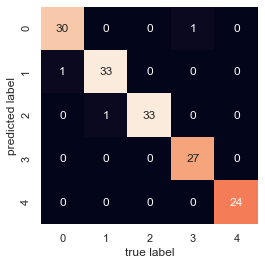

In [12]:
knn_mat = confusion_matrix(ytest1, knn_ypred)
sns.heatmap(knn_mat.T, square=True, annot=True, fmt='d', cbar=False)
plt.xlabel('true label')
plt.ylabel('predicted label')

# Support Vector Machine
Support vector machines (SVMs) are a particularly powerful and flexible class of supervised algorithms for both classification and regression. In this section, we will develop the intuition behind support vector machines and their use in classification problems.

SVM simply try to find a line or curve (in two dimensions) or manifold (in multiple dimensions) that divides the classes from each other.
   
To make the Motivation of SVM clear:
As an example of this, consider the simple case of a classification task, in which the two classes of points are well separated: The dataset used above are resampling that only two different types of point

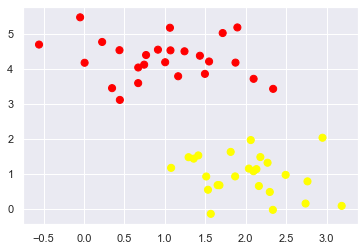

In [13]:
#Resampling a simple dataset
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=0.60)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

A linear discriminative classifier would attempt to draw a straight line separating the two sets of data, and thereby create a model for classification. For two dimensional data like that shown here, this is a task we could do by hand. But immediately we see a problem: there is more than one possible dividing line that can perfectly discriminate between the two classes!

We can draw them as follows:

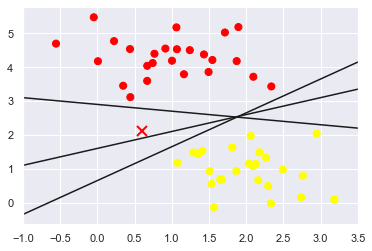

In [14]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

These are three very different separators which, nevertheless, perfectly discriminate between these samples. Depending on which you choose, a new data point (e.g., the one marked by the "X" in this plot) will be assigned a different label! Evidently our simple intuition of "drawing a line between classes" is not enough, and we need to think a bit deeper.

SVM: Maximizing the Margin

SVMs offer one way to improve on this. The intuition is this: rather than simply drawing a zero-width line between the classes, we can draw around each line a margin of some width, up to the nearest point. Here is an example of how this might look:

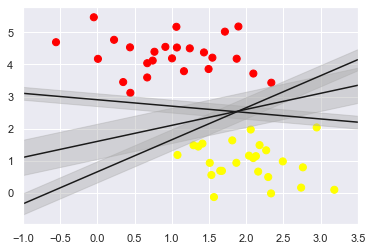

In [15]:
xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

for m, b, d in [(1, 0.65, 0.33), (0.5, 1.6, 0.55), (-0.2, 2.9, 0.2)]:
    yfit = m * xfit + b
    plt.plot(xfit, yfit, '-k')
    plt.fill_between(xfit, yfit - d, yfit + d, edgecolor='none',
                     color='#AAAAAA', alpha=0.4)

plt.xlim(-1, 3.5);

In SVMs, the line that maximizes this margin is the one we will choose as the optimal model. SVMs are an example of such a maximum margin estimator.

Fitting a SVM

Let's see the result of an actual fit to this data: we will use Scikit-Learn's support vector classifier to train an SVM model on this data. For the time being, we will use a linear kernel and set the C parameter to a very large number (we'll discuss the meaning of these in more depth momentarily).

In [16]:
from sklearn.svm import SVC # "Support vector classifier"
svm_model = SVC(kernel='linear', C=1E10)
svm_model.fit(X, y)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

To better visualize what's happening here, let's create a quick convenience function that will plot SVM decision boundaries for us:

In [17]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

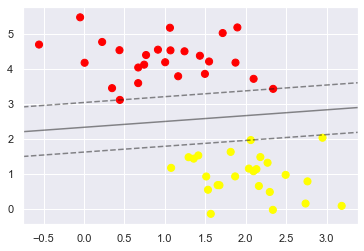

In [18]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(svm_model);

This is the dividing line that maximizes the margin between the two sets of points. Notice that a few of the training points just touch the margin: they are indicated by the black circles in this figure. These points are the pivotal elements of this fit, and are known as the support vectors, and give the algorithm its name. In Scikit-Learn, the identity of these points are stored in the support_vectors_ attribute of the classifier:

In [18]:
svm_model.support_vectors_

array([[0.44359863, 3.11530945],
       [2.33812285, 3.43116792],
       [2.06156753, 1.96918596]])

A key to this classifier's success is that for the fit, only the position of the support vectors matter; any points further from the margin which are on the correct side do not modify the fit! Technically, this is because these points do not contribute to the loss function used to fit the model, so their position and number do not matter so long as they do not cross the margin.

We can see this, for example, if we plot the model learned from the first 60 points and first 120 points of this dataset:

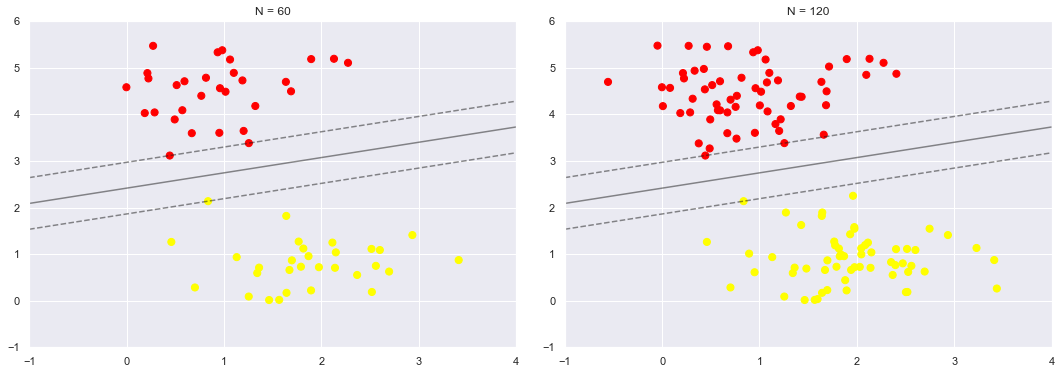

In [19]:
def plot_svm(N=10, ax=None):
    X, y = make_blobs(n_samples=200, centers=2,
                      random_state=0, cluster_std=0.60)
    X = X[:N]
    y = y[:N]
    model = SVC(kernel='linear', C=1E10)
    model.fit(X, y)
    
    ax = ax or plt.gca()
    ax.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
    ax.set_xlim(-1, 4)
    ax.set_ylim(-1, 6)
    plot_svc_decision_function(model, ax)

fig, ax = plt.subplots(1, 2, figsize=(16, 6))
fig.subplots_adjust(left=0.0625, right=0.95, wspace=0.1)
for axi, N in zip(ax, [60, 120]):
    plot_svm(N, axi)
    axi.set_title('N = {0}'.format(N))

In the left panel, we see the model and the support vectors for 60 training points. In the right panel, we have doubled the number of training points, but the model has not changed: the three support vectors from the left panel are still the support vectors from the right panel. This insensitivity to the exact behavior of distant points is one of the strengths of the SVM model.

If you are running this notebook live, you can use IPython's interactive widgets to view this feature of the SVM model interactively:

In [23]:
#from ipywidgets import interact, fixed
#interact(plot_svm, N=[10, 200], ax=fixed(None));

# On dataset 2


In [24]:
from sklearn.datasets import fetch_lfw_people
#Load the Labeled Faces in the Wild (LFW) people dataset (classification).
#Based on the Parameter min_faces_per_person: 
#The extracted dataset will only retain pictures of people that have at least min_faces_per_person different pictures.
faces = fetch_lfw_people(min_faces_per_person=60)
#To remind us what we're looking at
print(faces.target_names)
print(faces.images.shape)

['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)


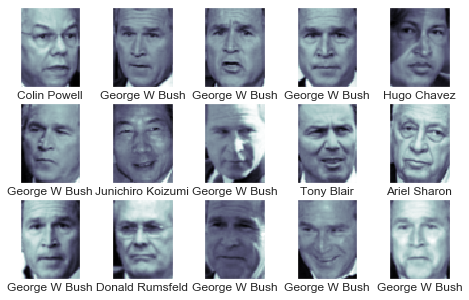

In [25]:
#Display the faces: each image is 62*47 nearly 3000 pixels
fig, ax = plt.subplots(3, 5, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(faces.images[i], cmap='bone')
    axi.set(xticks=[], yticks=[],
            xlabel=faces.target_names[faces.target[i]])

In [26]:
xtrain2, xtest2, ytrain2, ytest2 = train_test_split(faces.data, faces.target, random_state=42)

# Using Decision Tree

In [27]:
#Make an instance of the Decision Tree Model
dt_model2 = DecisionTreeClassifier(max_depth = 5);
#Train the model on the data
dt_model2.fit(xtrain2, ytrain2)
dt_ypred2 = dt_model2.predict(xtest2)

Now, we can take a look at the classification report for this decision tree classifier

In [28]:
print(metrics.classification_report(dt_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.13      0.40      0.20         5
           1       0.78      0.36      0.49       149
           2       0.10      0.30      0.15        10
           3       0.48      0.55      0.52       110
           4       0.26      0.29      0.27        21
           5       0.40      0.62      0.48        13
           6       0.08      0.12      0.10         8
           7       0.12      0.24      0.16        21

    accuracy                           0.41       337
   macro avg       0.29      0.36      0.30       337
weighted avg       0.55      0.41      0.44       337



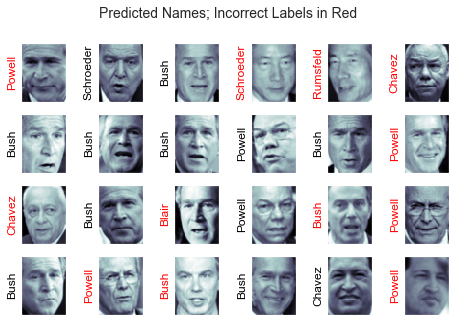

In [29]:
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[dt_ypred2[i]].split()[-1],
                   color='black' if dt_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# By KNN

In [30]:
#Make an instance of the KNN Model
knn_model2 = KNeighborsClassifier(n_neighbors=5)
#Train this KNN Model on data
knn_model2.fit(xtest2, ytest2)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [31]:
knn_ypred2 = knn_model2.predict(xtest2)
print(metrics.classification_report(knn_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.27      0.50      0.35         8
           1       0.93      0.58      0.72       108
           2       0.65      0.61      0.62        33
           3       0.81      0.71      0.76       143
           4       0.26      0.67      0.38         9
           5       0.30      0.55      0.39        11
           6       0.50      0.75      0.60         8
           7       0.33      0.82      0.47        17

    accuracy                           0.66       337
   macro avg       0.51      0.65      0.54       337
weighted avg       0.76      0.66      0.68       337



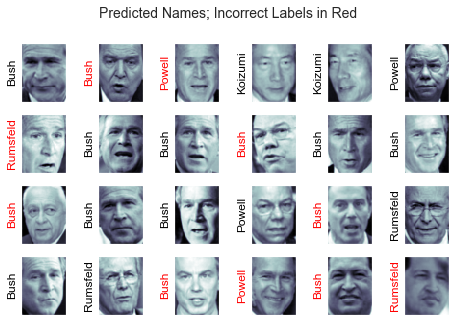

In [32]:
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[knn_ypred2[i]].split()[-1],
                   color='black' if knn_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

# By SVM

In [33]:
svm_model2 = SVC(kernel='linear', C=1E10)
svm_model2.fit(xtrain2, ytrain2)

SVC(C=10000000000.0, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=3, gamma='scale',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

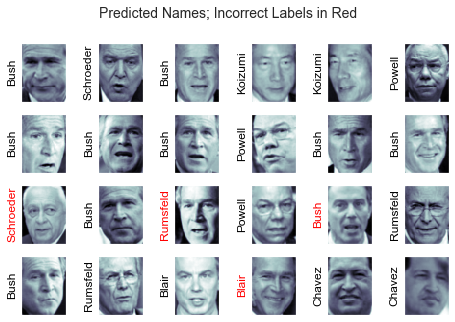

In [34]:
svm_ypred2 = svm_model2.predict(xtest2)
fig, ax = plt.subplots(4, 6, figsize=(8, 5))
for i, axi in enumerate(ax.flat):
    axi.imshow(xtest2[i].reshape(62, 47), cmap='bone')
    axi.set(xticks=[], yticks=[])
    axi.set_ylabel(faces.target_names[svm_ypred2[i]].split()[-1],
                   color='black' if svm_ypred2[i] == ytest2[i] else 'red')
fig.suptitle('Predicted Names; Incorrect Labels in Red', size=14);

In [35]:
print(metrics.classification_report(svm_ypred2,ytest2))

              precision    recall  f1-score   support

           0       0.67      0.67      0.67        15
           1       0.85      0.82      0.83        71
           2       0.74      0.72      0.73        32
           3       0.84      0.90      0.87       118
           4       0.78      0.67      0.72        27
           5       0.65      0.93      0.76        14
           6       1.00      0.80      0.89        15
           7       0.86      0.80      0.83        45

    accuracy                           0.82       337
   macro avg       0.80      0.79      0.79       337
weighted avg       0.82      0.82      0.82       337



# Clustering: K-means (unsupervised learning)
The k-means algorithm searches for a pre-determined number of clusters within an unlabeled multidimensional dataset. It accomplishes this using a simple conception of what the optimal clustering looks like:
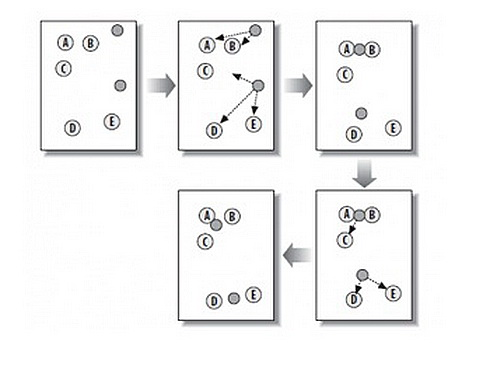The "cluster center" is the arithmetic mean of all the points belonging to the cluster.
Each point is closer to its own cluster center than to other cluster centers.

To emphasize that this is an unsupervised algorithm, we will leave the labels out of the visualization

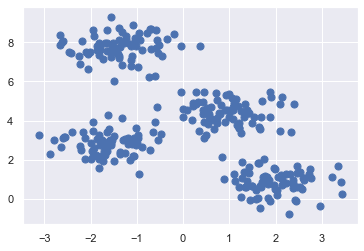

In [36]:
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

By eye, it is relatively easy to pick out the four clusters. The k-means algorithm does this automatically, and in Scikit-Learn uses the typical estimator API:

In [37]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

Let's visualize the results by plotting the data colored by these labels. We will also plot the cluster centers as determined by the k-means estimator:

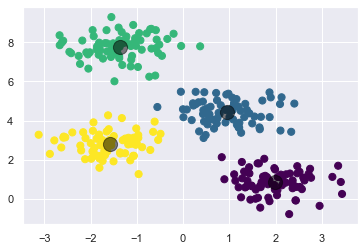

In [38]:
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

# k-means on faces
Here we will attempt to use k-means to try to identify similar faces without using the original label information; this might be similar to a first step in extracting meaning from a new dataset about which you don't have any a priori label information.

Recall that the faces we getted consist of 1,348 samples with 2914 features, where each of the 2914 features is the brightness of one pixel in an 62×47 image, as follow:
['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Junichiro Koizumi' 'Tony Blair']
(1348, 62, 47)

The clustering can be performed as we did before:

In [39]:
kmeans = KMeans(n_clusters=8, random_state=0)
clusters = kmeans.fit_predict(faces.data)
kmeans.cluster_centers_.shape

(8, 2914)

The result is 8 clusters in 2914 dimensions. Notice that the cluster centers themselves are 2914-dimensional points, and can themselves be interpreted as the "typical" digit within the cluster. Let's see what these cluster centers look like:

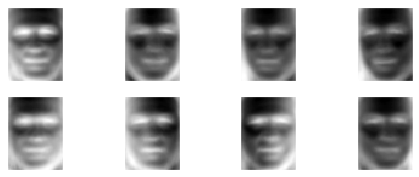

In [40]:
fig, ax = plt.subplots(2, 4, figsize=(8, 3))
centers = kmeans.cluster_centers_.reshape(8, 62, 47)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, interpolation='nearest', cmap=plt.cm.binary)

We see that even without the labels, KMeans is able to find clusters whose centers are recognizable faces, with perhaps the exceptions.

Now we can check how accurate our unsupervised clustering was in finding similar faces within the data:

Because k-means knows nothing about the identity of the cluster, the 0–7 labels may be permuted. We can fix this by matching each learned cluster label with the true labels found in them:

In [41]:
from scipy.stats import mode

labels = np.zeros_like(clusters)
for i in range(8):
    mask = (clusters == i)
    labels[mask] = mode(faces.target[mask])[0]

Now we can check how accurate our unsupervised clustering was in finding similar digits within the data:

In [40]:
from sklearn.metrics import accuracy_score
accuracy_score(faces.target, labels)

0.4035608308605341

 Let's check the confusion matrix for this:

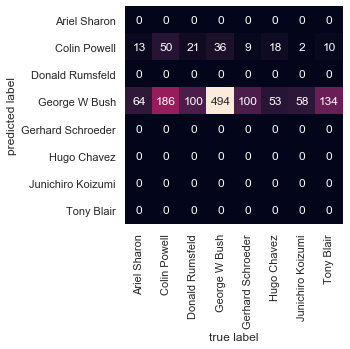

In [42]:
mat = confusion_matrix(faces.target, labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=faces.target_names,
            yticklabels=faces.target_names)
plt.xlabel('true label')
plt.ylabel('predicted label');